In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Inspect "Measurement"
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b05f44b5c8>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [12]:
# Inspect "Station"
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b05f4fc608>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168}

In [13]:
# Identify date ranges for one year.
last_date = dt.datetime.strptime(session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0],"%Y-%m-%d")
first_date = last_date - dt.timedelta(days = 365)

In [14]:
# Generate dataframe for percepitation for last year such that date is the index and the dataframe is in order by date.
prcp_year = pd.DataFrame()
date_list = []
prcp_list = []

for i in session.query(Measurement).filter(Measurement.date > first_date):
    date_to_add = dt.datetime.strptime(i.date,"%Y-%m-%d")
    date_list.append(date_to_add)
    prcp_list.append(i.prcp)

prcp_year["Date"] = date_list
prcp_year["Prcp"] = prcp_list

prcp_year.set_index("Date", inplace = True)
prcp_year.sort_index()
prcp_year.dropna(inplace = True)
prcp_year


,Prcp
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# ---- See above

# Calculate the date 1 year ago from the last data point in the database
# ---- See above

# Perform a query to retrieve the data and precipitation scores
# ---- See above

# Save the query results as a Pandas DataFrame and set the index to the date column
# ---- See above

# Sort the dataframe by date
# ---- See above


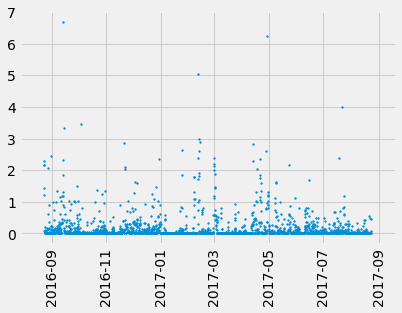

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.scatter(prcp_year.index, prcp_year.Prcp, s=3)
plt.xticks(rotation='vertical')
plt.show()


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_year.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_list = []
counts_list = []

for i in session.query(Station.station):
    station_list.append(i.station)
    
for i in station_list:
    counts_list.append(session.query(Measurement.station).filter(Measurement.station == i).count())

station_activity = pd.DataFrame()
station_activity["Station"] = station_list
station_activity["Count"] = counts_list
station_activity.set_index("Station", inplace = True)

station_activity.sort_values(by=['Count'],ascending = False)

,Count
Station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

busiest = station_activity[station_activity["Count"]==station_activity["Count"].max()].index.values[0]
busy_temp_list = []

for i in session.query(Measurement).filter(Measurement.station == busiest):
    busy_temp_list.append(i.tobs)

print(min(busy_temp_list))
print(max(busy_temp_list))
print(np.mean(busy_temp_list))

54.0
85.0
71.66378066378067


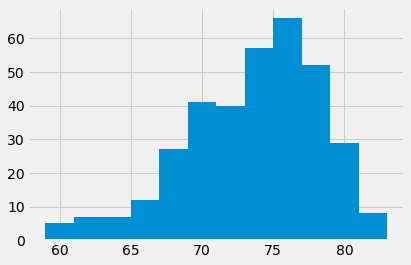

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Derive the temperature for the dataframe to accomplish the above.
busy_temp_df = pd.DataFrame()
date_list = []
temp_list = []

for i in session.query(Measurement).filter(Measurement.station == busiest).filter(Measurement.date > first_date):
    date_to_add = dt.datetime.strptime(i.date,"%Y-%m-%d")
    date_list.append(date_to_add)
    temp_list.append(i.tobs)

busy_temp_df["Date"] = date_list
busy_temp_df["Temp"] = temp_list

busy_temp_df.set_index("Date", inplace = True)
busy_temp_df.sort_index()
busy_temp_df.dropna(inplace = True)

# Generate the histogram.
plt.hist(x = busy_temp_df["Temp"], bins = 12)
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
